# Optimizer code

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
File="/content/drive/MyDrive/Group_32/train"
myfolder=os.listdir(File)
print(myfolder)

Train_0=[]
Train_3=[]
Train_5=[]
Train_6=[]
Train_9=[]
for folder in myfolder:
  path=File+'/'+folder
  print(path)
  MyImages=os.listdir(path)
  if 'Group_32/train/6' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       Train_6.append(temp_img)
  if 'Group_32/train/0' in path:
    for img in MyImages:
      temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
      Train_0.append(temp_img)
  if 'Group_32/train/5' in path:
    for img in MyImages:
      temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
      Train_5.append(temp_img)
  if 'Group_32/train/3' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       Train_3.append(temp_img)
  if 'Group_32/train/9' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       Train_9.append(temp_img)

['6', '0', '9', '3', '5']
/content/drive/MyDrive/Group_32/train/6
/content/drive/MyDrive/Group_32/train/0
/content/drive/MyDrive/Group_32/train/9
/content/drive/MyDrive/Group_32/train/3
/content/drive/MyDrive/Group_32/train/5


In [4]:
Train_6=np.array(Train_6)
Train_0=np.array(Train_0)
Train_9=np.array(Train_9)
Train_5=np.array(Train_5)
Train_3=np.array(Train_3)

In [10]:
Train_9.shape

(2277, 28, 28)

In [11]:
Train_0=Train_0.reshape(2277,784)
Train_3=Train_3.reshape(2277,784)
Train_5=Train_5.reshape(2277,784)
Train_6=Train_6.reshape(2277,784)
Train_9=Train_9.reshape(2277,784)

In [12]:
Train_0=pd.DataFrame(Train_0)
Train_0['Label']=0
Train_3=pd.DataFrame(Train_3)
Train_3['Label']=3
Train_5=pd.DataFrame(Train_5)
Train_5['Label']=5
Train_6=pd.DataFrame(Train_6)
Train_6['Label']=6
Train_9=pd.DataFrame(Train_9)
Train_9['Label']=9


In [13]:
PDX_Train=pd.concat([Train_0,Train_3,Train_5,Train_6,Train_9], ignore_index=True)

In [14]:
PDX_Train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,3,3,...,0,0,0,0,5,0,0,0,0,0
3,0,0,0,0,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,0,0,0,0,0,0,0,0,5,3,...,0,3,5,6,0,0,0,0,0,9
11381,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,9
11382,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9
11383,0,9,8,0,0,0,0,0,1,0,...,1,1,6,0,1,0,0,0,0,9


In [15]:
#Shuffeling Dataset
PDX_Train=PDX_Train.sample(frac=1)

In [16]:
PDX_Train=PDX_Train.reset_index(drop=True)

In [17]:
#Printing Shuffled Dataset
PDX_Train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9
4,0,0,3,8,0,2,4,0,4,0,...,7,2,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,0,0,0,0,0,0,0,0,3,3,...,0,0,8,2,0,0,0,0,0,5
11381,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,3
11382,0,0,0,0,0,0,0,0,0,17,...,0,0,0,0,0,0,0,0,0,5
11383,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Seperating labels Of Data
PDY_Train=PDX_Train[['Label']]

In [19]:
PDY_Train

,Label
0,3
1,5
2,3
3,9
4,0
...,...
11380,5
11381,3
11382,5
11383,0


In [20]:
#Seperating Image Data i.e X_Train
PDX_Train=PDX_Train.drop('Label',axis=1)

In [21]:
PDX_Train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,8,0,2,4,0,4,0,...,0,7,2,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,0,0,0,0,0,0,0,0,3,3,...,2,0,0,8,2,0,0,0,0,0
11381,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
11382,0,0,0,0,0,0,0,0,0,17,...,0,0,0,0,0,0,0,0,0,0
11383,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


# Saving Data Set On Drive

In [22]:
PDX_Train.to_csv('PDX_Train.csv')
!cp PDX_Train.csv "/content/drive/MyDrive/Group_32"

In [23]:
PDY_Train.to_csv('PDY_Train.csv')
!cp PDY_Train.csv "/content/drive/MyDrive/Group_32"

**Converting pandas Dataframe back to Np.array**

In [24]:
X_Train=(PDX_Train.values)

In [25]:
Y_Train=PDY_Train.values

** Plotting Some Images From Tranning Data**



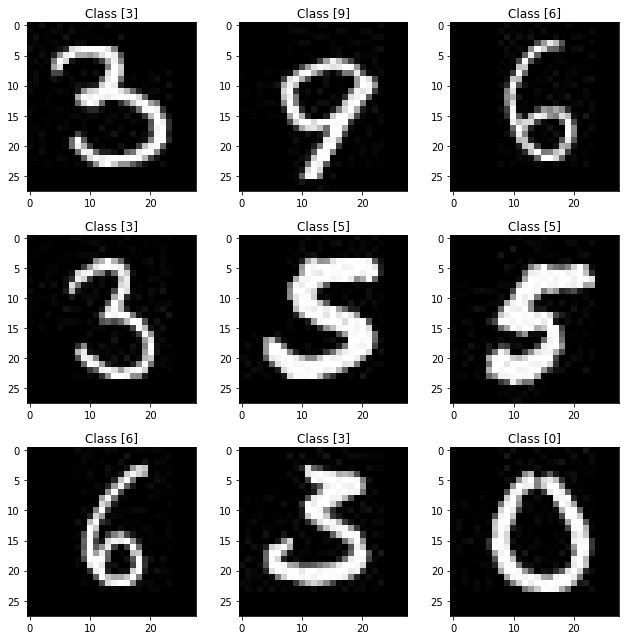

In [26]:
import random
iX_Train=X_Train.reshape(11385,28,28)
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0,1000)
    plt.imshow(iX_Train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_Train[num]))
    
plt.tight_layout()

In [27]:
#Ready data Set
X_FinalTrain=X_Train
Y_FinalTrain=Y_Train

In [28]:
X_FinalTrain.shape

(11385, 784)

In [29]:
Y_FinalTrain

array([[3],
       [5],
       [3],
       ...,
       [5],
       [0],
       [9]])

**Using tf.stack to convert to array**

In [30]:
X_Train=tf.stack(X_FinalTrain)
Y_Train=tf.stack(Y_FinalTrain)

In [31]:
X_Train

<tf.Tensor: shape=(11385, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

**OneHot Encoding**

In [ ]:
# from sklearn.preprocessing import LabelBinarizer
# p=np.array(Y_Train)
# p=pd.DataFrame(p)
# Y_Train = LabelBinarizer().fit_transform(p)

In [32]:
Y_Train

<tf.Tensor: shape=(11385, 1), dtype=int64, numpy=
array([[3],
       [5],
       [3],
       ...,
       [5],
       [0],
       [9]])>

**--------------------------------------------------------Preparing Test DataSet-----------------------------------------------------------------------**

In [33]:
File="/content/drive/MyDrive/Group_32/test"
myfolder=os.listdir(File)
print(myfolder)
Test_0=[]
Test_3=[]
Test_5=[]
Test_6=[]
Test_9=[]
for folder in myfolder:
  path=File+'/'+folder
  print(path)
  MyImages=os.listdir(path)
  
  if 'Group_32/test/0' in path:
    for img in MyImages:
      temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
      Test_0.append(temp_img)
  if 'Group_32/test/3' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       Test_3.append(temp_img)
  if 'Group_32/test/5' in path:
    for img in MyImages:
      temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
      Test_5.append(temp_img)
  if 'Group_32/test/6' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       Test_6.append(temp_img)
  if 'Group_32/test/9' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       Test_9.append(temp_img)

['3', '6', '5', '9', '0']
/content/drive/MyDrive/Group_32/test/3
/content/drive/MyDrive/Group_32/test/6
/content/drive/MyDrive/Group_32/test/5
/content/drive/MyDrive/Group_32/test/9
/content/drive/MyDrive/Group_32/test/0


In [34]:
Test_9=np.array(Test_9)
Test_0=np.array(Test_0)
Test_6=np.array(Test_6)
Test_5=np.array(Test_5)
Test_3=np.array(Test_3)

In [35]:
Test_9=Test_9.reshape(759,784)
Test_0=Test_0.reshape(759,784)
Test_6=Test_6.reshape(759,784)
Test_5=Test_5.reshape(759,784)
Test_3=Test_3.reshape(759,784)

In [36]:
Test_9=pd.DataFrame(Test_9)
Test_9['Label']=9
Test_0=pd.DataFrame(Test_0)
Test_0['Label']=0
Test_6=pd.DataFrame(Test_6)
Test_6['Label']=6
Test_5=pd.DataFrame(Test_5)
Test_5['Label']=5
Test_3=pd.DataFrame(Test_3)
Test_3['Label']=3

In [37]:
#Cancatenating All Test Data
PDX_Test=pd.concat([Test_0,Test_3,Test_5,Test_6,Test_9], ignore_index=True)

In [38]:
#Shuffeling All Test data
PDX_Test=PDX_Test.sample(frac=1)

In [39]:
#Seperating labes of Test Data
PDY_Test=PDX_Test[['Label']]

In [40]:
#Plotting Test Data
PDY_Test

,Label
948,3
3792,9
3602,9
1179,3
1894,5
...,...
1362,3
1971,5
812,3
2794,6


In [41]:
#Seperating images data from Test Data
PDX_Test=PDX_Test.drop('Label',axis=1)

In [42]:
#Printing Test data
PDX_Test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
948,11,0,2,0,1,13,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3792,0,0,0,0,0,0,0,0,4,0,...,0,3,0,5,1,0,0,0,0,0
3602,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1894,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,2,3,7,0,0,0,4,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
2794,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


# Saving Datasets To Drive.

In [43]:
PDX_Test.to_csv('PDX_Test.csv')
!cp PDX_Test.csv "/content/drive/MyDrive/Group_32"

In [44]:
PDY_Test.to_csv('PDY_Test.csv')
!cp PDY_Test.csv "/content/drive/MyDrive/Group_32"

**Converting Back To np.array**

In [45]:
X_Test=PDX_Test.values

In [46]:
Y_Test=PDY_Test.values

In [47]:
X_Test.shape

(3795, 784)

In [48]:
Y_Test.shape

(3795, 1)

In [49]:
X_Test=tf.stack(X_Test)
Y_Test=tf.stack(Y_Test)

In [50]:
X_Test.shape

TensorShape([3795, 784])

**OneHot Coding On Test Data**

In [126]:
# Y_Test=np.array(Y_Test)
# Y_Test=pd.DataFrame(Y_Test)
# Y_Test = LabelBinarizer().fit_transform(Y_Test)

**------------------------------------------------------Validation Dataset Generation-------------------------------------------------**

In [51]:
File="/content/drive/MyDrive/Group_32/val"
myfolder=os.listdir(File)
print(myfolder)
val_0=[]
val_3=[]
val_5=[]
val_6=[]
val_9=[]
for folder in myfolder:
  path=File+'/'+folder
  print(path)
  MyImages=os.listdir(path)
  if 'Group_32/val/0' in path:
    for img in MyImages:
      temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
      val_0.append(temp_img)
  if 'Group_32/val/3' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       val_3.append(temp_img)
  if 'Group_32/val/5' in path:
    for img in MyImages:
      temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
      val_5.append(temp_img)
  if 'Group_32/val/6' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       val_6.append(temp_img)
  if 'Group_32/val/9' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       val_9.append(temp_img)

['6', '5', '3', '0', '9']
/content/drive/MyDrive/Group_32/val/6
/content/drive/MyDrive/Group_32/val/5
/content/drive/MyDrive/Group_32/val/3
/content/drive/MyDrive/Group_32/val/0
/content/drive/MyDrive/Group_32/val/9


In [52]:
Val_0=np.array(val_0)
Val_3=np.array(val_3)
Val_5=np.array(val_5)
Val_6=np.array(val_6)
Val_9=np.array(val_9)

In [53]:
Val_9.shape

(759, 28, 28)

In [54]:
Val_9=Val_9.reshape(759,784)
Val_0=Val_0.reshape(759,784)
Val_6=Val_6.reshape(759,784)
Val_5=Val_5.reshape(759,784) 
Val_3=Val_3.reshape(759,784)

In [55]:
Val_9=pd.DataFrame(Val_9)
Val_9['Label']=9
Val_0=pd.DataFrame(Val_0)
Val_0['Label']=0
Val_6=pd.DataFrame(Val_6)
Val_6['Label']=6
Val_5=pd.DataFrame(Val_5)
Val_5['Label']=5
Val_3=pd.DataFrame(Val_3)
Val_3['Label']=3

In [56]:
PDX_Val=pd.concat([Val_0,Val_3,Val_5,Val_6,Val_9], ignore_index=True)

In [57]:
PDX_Val=PDX_Val.sample(frac=1)

In [58]:
PDY_Val=PDX_Val[['Label']]

In [59]:
PDY_Val

,Label
2513,6
1041,3
3093,9
1919,5
953,3
...,...
2217,5
2255,5
1748,5
885,3


In [60]:
PDX_Val=PDX_Val.drop('Label',axis=1)

In [61]:
PDX_Val

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
2513,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
3093,0,0,0,0,0,0,0,0,3,1,...,0,4,0,17,0,4,0,0,0,0
1919,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1748,0,0,0,0,0,0,0,0,2,0,...,2,0,0,0,0,6,0,0,0,0
885,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


# Saving Validation Dataset To Drive

In [62]:
PDX_Val.to_csv('PDX_Val.csv')
!cp PDX_Val.csv "/content/drive/MyDrive/Group_32"

In [63]:
PDY_Val.to_csv('PDY_Val.csv')
!cp PDY_Val.csv "/content/drive/MyDrive/Group_32"

In [64]:
X_Val=PDX_Val.values

In [65]:
Y_Val=PDY_Val.values

In [66]:
X_Val.shape

(3795, 784)

In [67]:
Y_Val.shape

(3795, 1)

In [68]:
X_Val=tf.stack(X_Val)
Y_Val=tf.stack(Y_Val)

In [69]:
X_Test.shape

TensorShape([3795, 784])

In [145]:
# Y_Val=np.array(Y_Val)
# Y_Val=pd.DataFrame(Y_Val)
# Y_Val = LabelBinarizer().fit_transform(Y_Val)

In [70]:
Y_Val

<tf.Tensor: shape=(3795, 1), dtype=int64, numpy=
array([[6],
       [3],
       [9],
       ...,
       [5],
       [3],
       [3]])>

################################################################################

In [5]:
path = "/content/drive/MyDrive/Group_32/PDX_Train.csv"
PDX_Train = pd.read_csv(path)
PDX_Train=PDX_Train.drop('Unnamed: 0',axis=1)

In [6]:
path = "/content/drive/MyDrive/Group_32/PDY_Train.csv"
PDY_Train = pd.read_csv(path)
PDY_Train=PDY_Train.drop('Unnamed: 0',axis=1)

In [7]:
path = "/content/drive/MyDrive/Group_32/PDX_Test.csv"
PDX_Test = pd.read_csv(path)
PDX_Test=PDX_Test.drop('Unnamed: 0',axis=1)

In [8]:
path = "/content/drive/MyDrive/Group_32/PDY_Test.csv"
PDY_Test = pd.read_csv(path)
PDY_Test=PDY_Test.drop('Unnamed: 0',axis=1)

In [9]:
path = "/content/drive/MyDrive/Group_32/PDX_Val.csv"
PDX_Val = pd.read_csv(path)
PDX_Val=PDX_Val.drop('Unnamed: 0',axis=1)

In [10]:
path = "/content/drive/MyDrive/Group_32/PDY_Val.csv"
PDY_Val = pd.read_csv(path)
PDY_Val=PDY_Val.drop('Unnamed: 0',axis=1)

In [11]:
X_Train=PDX_Train.values
Y_Train=PDY_Train.values

In [12]:
X_Test=PDX_Test.values
Y_Test=PDY_Test.values

In [13]:
X_Val=PDX_Val.values
Y_Val=PDY_Val.values

In [14]:
#Normalizing Data.
X_Train=X_Train/255
X_Val=X_Val/255
X_Test=X_Test/255


#Que_1:- Different Types of Optimizer 

1.   SGD (Batch Size 1).

2.   Batch Gradient Descent Algorithm (Vanilla Gradient Descent).
3.   SGD with momentum (NAG).
4.   RMSProp Algorithm.
5.   Adam Optimizer.

# **SGD (Batch Size_32)**


In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [21]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10e-4, # Stopping Criteria.
    patience=3, # how many epochs to wait before stopping
    mode='auto',
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)#13

Epoch 1/100
356/356 [==============================] - 2s 4ms/step - loss: 1.7249 - accuracy: 0.2004 - val_loss: 1.6392 - val_accuracy: 0.1671
Epoch 2/100
356/356 [==============================] - 1s 3ms/step - loss: 1.6283 - accuracy: 0.2148 - val_loss: 1.6203 - val_accuracy: 0.2129
Epoch 3/100
356/356 [==============================] - 1s 3ms/step - loss: 1.6164 - accuracy: 0.2371 - val_loss: 1.6126 - val_accuracy: 0.2000
Epoch 4/100
356/356 [==============================] - 1s 3ms/step - loss: 1.6101 - accuracy: 0.2439 - val_loss: 1.6060 - val_accuracy: 0.5109
Epoch 5/100
356/356 [==============================] - 1s 3ms/step - loss: 1.6048 - accuracy: 0.2814 - val_loss: 1.6021 - val_accuracy: 0.3352
Epoch 6/100
356/356 [==============================] - 1s 3ms/step - loss: 1.5995 - accuracy: 0.2837 - val_loss: 1.5960 - val_accuracy: 0.2000
Epoch 7/100
356/356 [==============================] - 1s 3ms/step - loss: 1.5935 - accuracy: 0.3051 - val_loss: 1.5908 - val_accuracy: 0.2000

Best Validation Loss: 0.1764
Best Validation Accuracy: 0.9441


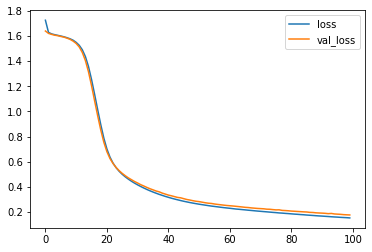

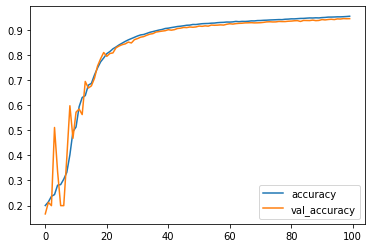

In [22]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [23]:
model.evaluate(X_Test, Y_Test)

119/119 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9510


[0.16945233941078186, 0.9509881138801575]

In [24]:
y_pred = model.predict(X_Test)

In [25]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [26]:
y_pred

array([[0.5280711 , 0.05537105, 0.0483455 , ..., 0.13246368, 0.05944716,
        0.6741982 ],
       [0.00415363, 0.04964709, 0.07508521, ..., 0.04708914, 0.02782164,
        0.9998808 ],
       [0.00330258, 0.04531006, 0.08183853, ..., 0.04078692, 0.0258851 ,
        0.999926  ],
       ...,
       [0.7862529 , 0.06572849, 0.05733449, ..., 0.09933437, 0.04942893,
        0.8574437 ],
       [0.9124207 , 0.03977553, 0.06186248, ..., 0.08483775, 0.06378648,
        0.6519273 ],
       [0.99879104, 0.0658474 , 0.04889087, ..., 0.05250689, 0.05140811,
        0.5652492 ]], dtype=float32)

In [27]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[739,   0,   0,   3,   0,   9,   5,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 713,   0,  34,   2,   0,   0,   8],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,  33,   0, 700,  11,   0,   0,   6],
       [  6,   0,   0,   1,   0,  14, 736,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,  19,   0,  13,   3,   0,   0, 721]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

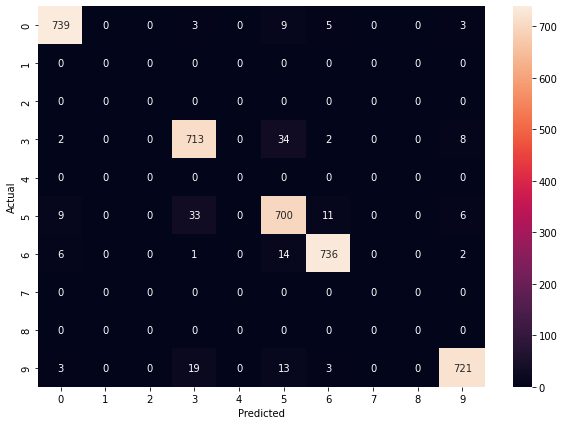

In [29]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **SGD (Batch Size_1)**


In [31]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10E-4, # Stopping Criteria.
    patience=3, # how many epochs to wait before stopping
    mode='auto',
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=1,
    epochs=100,
    callbacks=[early_stopping]
)#7m

Epoch 1/100
11385/11385 [==============================] - 28s 2ms/step - loss: 0.9873 - accuracy: 0.5972 - val_loss: 0.3831 - val_accuracy: 0.8814
Epoch 2/100
11385/11385 [==============================] - 28s 2ms/step - loss: 0.2913 - accuracy: 0.9058 - val_loss: 0.2379 - val_accuracy: 0.9262
Epoch 3/100
11385/11385 [==============================] - 32s 3ms/step - loss: 0.2037 - accuracy: 0.9352 - val_loss: 0.2089 - val_accuracy: 0.9307
Epoch 4/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1700 - accuracy: 0.9434 - val_loss: 0.1707 - val_accuracy: 0.9428
Epoch 5/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1527 - accuracy: 0.9504 - val_loss: 0.1749 - val_accuracy: 0.9439
Epoch 6/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1397 - accuracy: 0.9549 - val_loss: 0.1648 - val_accuracy: 0.9457
Epoch 7/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1301 - accuracy: 0.9591 - val_

Best Validation Loss: 0.1360
Best Validation Accuracy: 0.9557


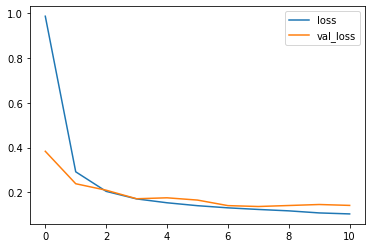

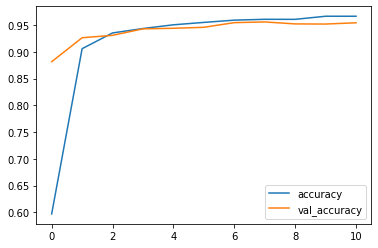

In [33]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [34]:
model.evaluate(X_Test, Y_Test)

119/119 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9576


[0.13978426158428192, 0.9575757384300232]

In [35]:
y_pred = model.predict(X_Test)

In [36]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [37]:
y_pred

array([[0.7877989 , 0.0575761 , 0.0215829 , ..., 0.05516154, 0.06527109,
        0.85622776],
       [0.00218286, 0.04861046, 0.0435215 , ..., 0.0485952 , 0.06509991,
        0.99995387],
       [0.00451146, 0.04681418, 0.0519722 , ..., 0.04515546, 0.07012308,
        0.99996746],
       ...,
       [0.7588348 , 0.05857318, 0.06407937, ..., 0.07762425, 0.07309684,
        0.9028036 ],
       [0.85335624, 0.03676175, 0.09600496, ..., 0.06159927, 0.06996934,
        0.44600803],
       [0.9997018 , 0.04582645, 0.09632137, ..., 0.07129461, 0.06364425,
        0.84806246]], dtype=float32)

In [38]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[746,   0,   0,   3,   0,   0,   7,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 722,   0,  27,   2,   0,   0,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,  35,   0, 694,  15,   0,   0,   4],
       [  5,   0,   0,   0,   0,  11, 743,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,  13,   0,   5,   2,   0,   0, 729]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

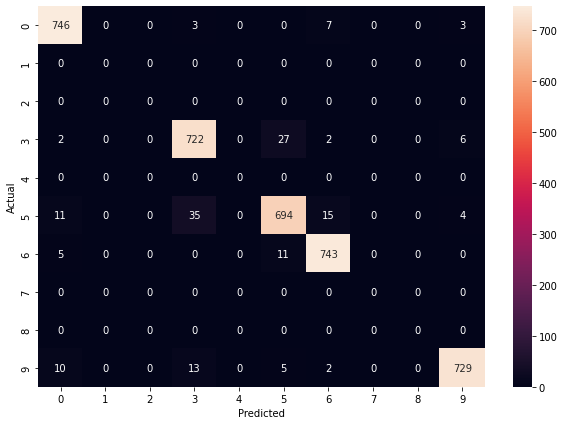

In [40]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Optimizer:- SGD (Batch Size_1)
#     EX_3
     Desc:-
            1. 3 Hiden Layer
               1.
               2.
               3.
            2. Stopping Criterion= 10^-4

In [42]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10E-4, # Stopping Criteria.
    patience=3, # how many epochs to wait before stopping
    mode='auto',
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=1,
    epochs=100,
    callbacks=[early_stopping]
)#11

Epoch 1/100
11385/11385 [==============================] - 27s 2ms/step - loss: 1.4055 - accuracy: 0.3926 - val_loss: 0.5497 - val_accuracy: 0.8374
Epoch 2/100
11385/11385 [==============================] - 26s 2ms/step - loss: 0.3514 - accuracy: 0.8870 - val_loss: 0.2605 - val_accuracy: 0.9220
Epoch 3/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.2403 - accuracy: 0.9249 - val_loss: 0.2268 - val_accuracy: 0.9307
Epoch 4/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1901 - accuracy: 0.9412 - val_loss: 0.2063 - val_accuracy: 0.9352
Epoch 5/100
11385/11385 [==============================] - 26s 2ms/step - loss: 0.1524 - accuracy: 0.9531 - val_loss: 0.1933 - val_accuracy: 0.9407
Epoch 6/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1273 - accuracy: 0.9592 - val_loss: 0.1349 - val_accuracy: 0.9597
Epoch 7/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1106 - accuracy: 0.9656 - val_

Best Validation Loss: 0.0968
Best Validation Accuracy: 0.9731


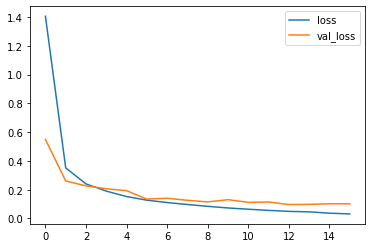

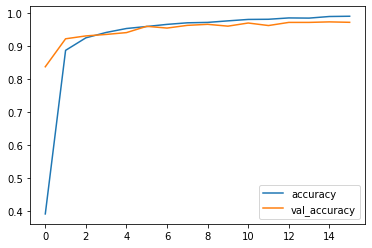

In [45]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [46]:
y_pred = model.predict(X_Test)

In [47]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [48]:
y_pred

array([[6.0614669e-01, 3.2898098e-02, 3.4993969e-02, ..., 3.4498747e-02,
        4.2200055e-02, 9.5426208e-01],
       [3.7861628e-06, 2.3332791e-02, 2.6185708e-02, ..., 2.8199719e-02,
        3.1995315e-02, 1.0000000e+00],
       [1.4971156e-05, 2.3692401e-02, 2.6722090e-02, ..., 2.6058543e-02,
        3.2886576e-02, 1.0000000e+00],
       ...,
       [6.5389559e-02, 3.0100252e-02, 2.9468203e-02, ..., 3.6620118e-02,
        3.5877101e-02, 9.9874830e-01],
       [9.7145748e-01, 2.4591580e-02, 2.4578217e-02, ..., 2.6749685e-02,
        2.3743881e-02, 4.2687085e-01],
       [9.9998724e-01, 2.6604280e-02, 2.4779163e-02, ..., 2.6376229e-02,
        2.9079992e-02, 6.1779559e-01]], dtype=float32)

In [49]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[750,   0,   0,   2,   0,   2,   5,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 735,   0,  14,   1,   0,   0,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,  18,   0, 714,  12,   0,   0,   6],
       [  4,   0,   0,   0,   0,  11, 744,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,  11,   0,   3,   0,   0,   0, 738]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

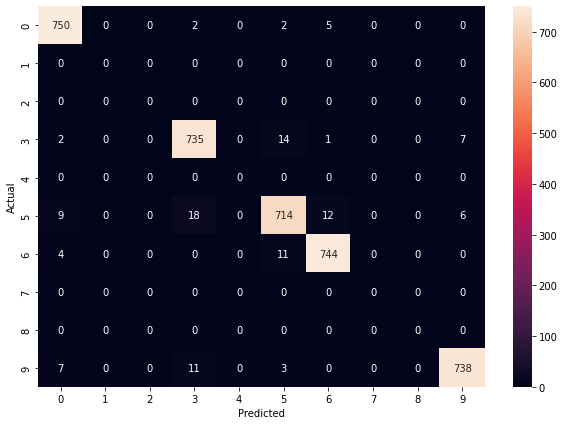

In [51]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Optimizer:- SGD (Batch Size_1)
#     EX_4
     Desc:-
            1. 3 Hiden Layer
               1.
               2.
               3.
            2. Stopping Criterion= 10^-4

In [52]:
model = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10E-4, # Stopping Criteria.
    patience=3, # how many epochs to wait before stopping
    mode='auto',
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=1,
    epochs=100,
    callbacks=[early_stopping]
)#9

Epoch 1/100
11385/11385 [==============================] - 28s 2ms/step - loss: 1.1968 - accuracy: 0.4871 - val_loss: 0.3959 - val_accuracy: 0.8653
Epoch 2/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.3280 - accuracy: 0.8909 - val_loss: 0.2903 - val_accuracy: 0.9049
Epoch 3/100
11385/11385 [==============================] - 28s 2ms/step - loss: 0.2473 - accuracy: 0.9212 - val_loss: 0.2085 - val_accuracy: 0.9323
Epoch 4/100
11385/11385 [==============================] - 28s 2ms/step - loss: 0.1919 - accuracy: 0.9397 - val_loss: 0.2031 - val_accuracy: 0.9347
Epoch 5/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1629 - accuracy: 0.9490 - val_loss: 0.2090 - val_accuracy: 0.9299
Epoch 6/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1491 - accuracy: 0.9513 - val_loss: 0.1825 - val_accuracy: 0.9397
Epoch 7/100
11385/11385 [==============================] - 27s 2ms/step - loss: 0.1377 - accuracy: 0.9556 - val_

Best Validation Loss: 0.1256
Best Validation Accuracy: 0.9592


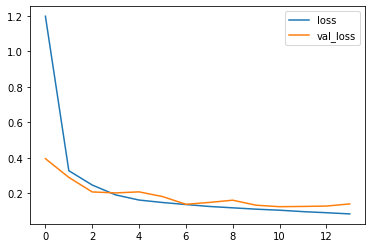

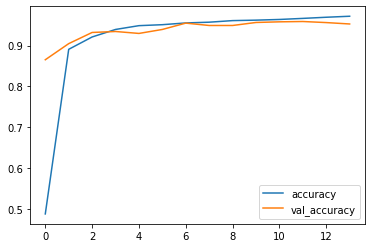

In [54]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [55]:
y_pred = model.predict(X_Test)

In [56]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [57]:
y_pred

array([[8.5157913e-01, 4.4180870e-02, 3.4393884e-02, ..., 4.6040643e-02,
        4.8828822e-02, 6.6539168e-01],
       [3.8905791e-04, 3.3083826e-02, 3.3165824e-02, ..., 3.9491147e-02,
        3.4628928e-02, 9.9999273e-01],
       [9.7561674e-04, 3.8577888e-02, 3.7622418e-02, ..., 4.5603953e-02,
        4.3891151e-02, 9.9999368e-01],
       ...,
       [5.9428167e-01, 5.4586906e-02, 5.1682595e-02, ..., 5.8394562e-02,
        4.5803357e-02, 8.7242085e-01],
       [6.1111122e-01, 6.4408757e-02, 6.8593457e-02, ..., 6.7545965e-02,
        4.8483394e-02, 1.6726182e-01],
       [9.9966991e-01, 6.0058650e-02, 6.0035143e-02, ..., 5.8953993e-02,
        4.4719335e-02, 8.6198306e-01]], dtype=float32)

In [58]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[740,   0,   0,   2,   0,   3,  11,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0, 721,   0,  29,   3,   0,   0,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,  18,   0, 718,  11,   0,   0,   5],
       [  3,   0,   0,   0,   0,  11, 745,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,  12,   0,   5,   2,   0,   0, 733]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

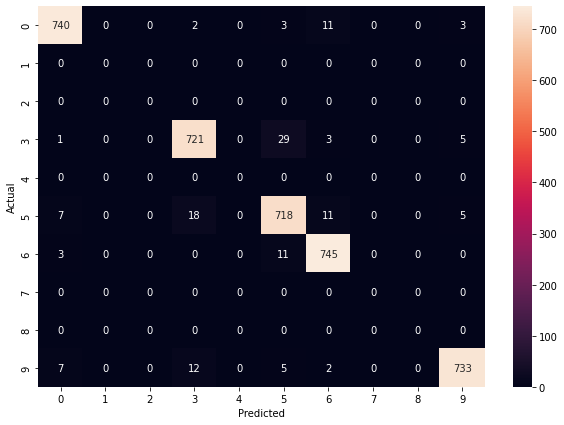

In [60]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Optimizer:- Batch or Vanilla gradient descent(Whole Size)**

#     EX_1
     Desc:-
            1. 3 Hiden Layer
               1.
               2.
               3.
            2. Stopping Criterion= 10^-4

In [61]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10E-4, # Stopping Criteria.
    patience=3, # how many epochs to wait before stopping
    mode='auto',
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=11385,
    epochs=100,
    callbacks=[early_stopping]
)#6sec

Epoch 1/100
1/1 [==============================] - 0s 480ms/step - loss: 2.5791 - accuracy: 0.0000e+00 - val_loss: 2.5432 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 2.5430 - accuracy: 0.0000e+00 - val_loss: 2.5088 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 2.5087 - accuracy: 0.0000e+00 - val_loss: 2.4762 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 2.4761 - accuracy: 0.0000e+00 - val_loss: 2.4453 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 2.4451 - accuracy: 0.0000e+00 - val_loss: 2.4158 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 2.4157 - accuracy: 0.0000e+00 - val_loss: 2.3878 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 51ms/step - loss: 2.3877 - accuracy: 0.0000e+00 - val_los

Best Validation Loss: 1.7380
Best Validation Accuracy: 0.2538


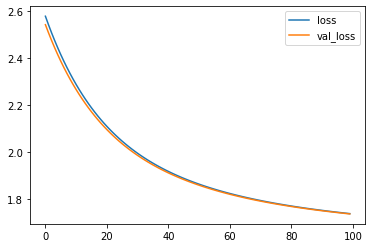

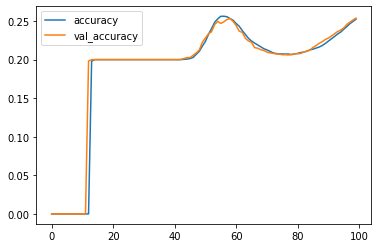

In [63]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [64]:
#Testing prediction
y_pred = model.predict(X_Test)

In [65]:
#Tranning Prediction
train_pred=model.predict(X_Train)

In [66]:
train_predicted=[]
for datapoint in train_pred:
  train_predicted.append(np.argmax(dataPoint))

In [67]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [68]:
y_pred

array([[0.65374297, 0.26378593, 0.18718174, ..., 0.23814629, 0.18218324,
        0.65855503],
       [0.65256685, 0.262157  , 0.18638098, ..., 0.23540011, 0.17888325,
        0.65743035],
       [0.65183526, 0.26269916, 0.18604298, ..., 0.23538217, 0.18007271,
        0.65682536],
       ...,
       [0.6550494 , 0.26244324, 0.18642238, ..., 0.23556475, 0.18110129,
        0.65809953],
       [0.6540518 , 0.2622893 , 0.18468605, ..., 0.23583372, 0.17949013,
        0.658751  ],
       [0.6545552 , 0.26191446, 0.18544996, ..., 0.23685518, 0.17940421,
        0.6579815 ]], dtype=float32)

Finding Confusion Matrix For Test data.

In [73]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[196,   0,   0,   4,   0,   0,  19,   0,   0, 540],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   6,   0,   0,   6,   0,   0, 736],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 36,   0,   0,   6,   0,   0,   5,   0,   0, 712],
       [  4,   0,   0,   4,   0,   0,  21,   0,   0, 730],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   6,   0,   0,  12,   0,   0, 739]], dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix For Test Data')

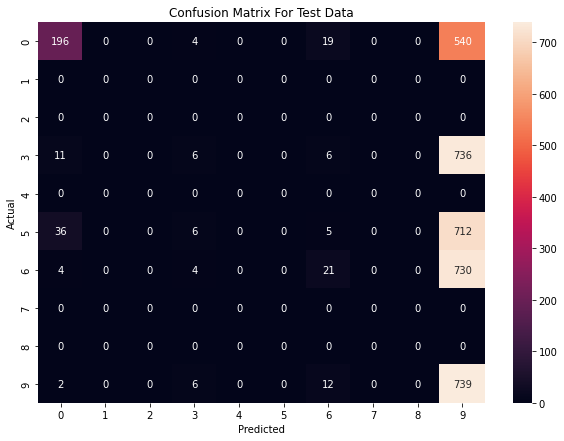

In [74]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Test Data')

Finding Confusion Matrix For Tranning data.

In [75]:
cm2 = tf.math.confusion_matrix(labels=Y_Train,predictions=train_predicted)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[2277,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2277,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2277,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2277,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2277,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix For Train Data')

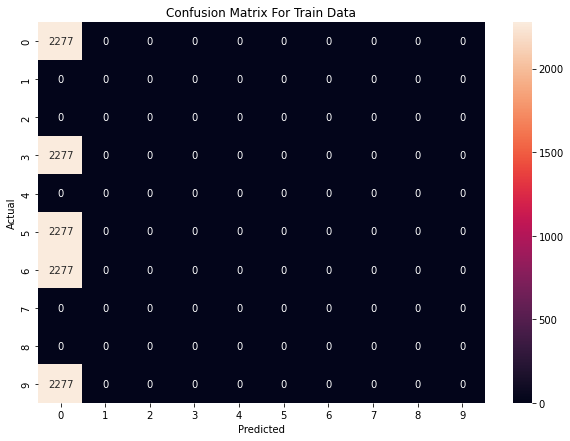

In [77]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Train Data')

# **Optimizer:- GD with Batch(Whole Size)**

#     EX_2
     Desc:-
            1. 3 Hiden Layer
               1.
               2.
               3.
            2. Stopping Criterion= 10^-4

In [78]:
model = keras.Sequential([
    keras.layers.Dense(600, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10E-4, # Stopping Criteria.
    patience=3, # how many epochs to wait before stopping
    mode='auto',
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=11385,
    epochs=100,
    callbacks=[early_stopping]
)#4sec

Epoch 1/100
1/1 [==============================] - 0s 421ms/step - loss: 1.6377 - accuracy: 0.1954 - val_loss: 1.6373 - val_accuracy: 0.2061
Epoch 2/100
1/1 [==============================] - 0s 81ms/step - loss: 1.6373 - accuracy: 0.1966 - val_loss: 1.6369 - val_accuracy: 0.2066
Epoch 3/100
1/1 [==============================] - 0s 90ms/step - loss: 1.6370 - accuracy: 0.1976 - val_loss: 1.6366 - val_accuracy: 0.2090
Epoch 4/100
1/1 [==============================] - 0s 121ms/step - loss: 1.6367 - accuracy: 0.1986 - val_loss: 1.6363 - val_accuracy: 0.2095


Best Validation Loss: 1.6363
Best Validation Accuracy: 0.2095


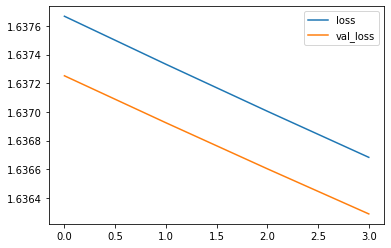

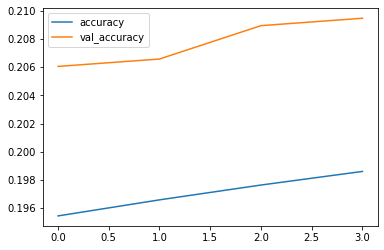

In [83]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [84]:
y_pred = model.predict(X_Test)

In [85]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [86]:
y_pred

array([[0.8286548 , 0.12969956, 0.13006452, ..., 0.10496575, 0.12444753,
        0.83055276],
       [0.8290408 , 0.12792875, 0.1304834 , ..., 0.10502223, 0.12609968,
        0.830914  ],
       [0.8290376 , 0.12920317, 0.13066444, ..., 0.10571657, 0.1255703 ,
        0.82997733],
       ...,
       [0.8289376 , 0.12860729, 0.12975384, ..., 0.10571051, 0.12581654,
        0.8305667 ],
       [0.82967144, 0.12916026, 0.13103254, ..., 0.10457473, 0.12512317,
        0.82976305],
       [0.82924044, 0.12893991, 0.13090578, ..., 0.10410605, 0.12590308,
        0.82993394]], dtype=float32)

In [87]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[242,   0,   0, 188,   0,  74, 111,   0,   0, 144],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 34,   0,   0, 151,   0, 156,  57,   0,   0, 361],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [234,   0,   0, 212,   0,  87,  12,   0,   0, 214],
       [355,   0,   0, 137,   0,  64, 104,   0,   0,  99],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [184,   0,   0,  19,   0,  35, 357,   0,   0, 164]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

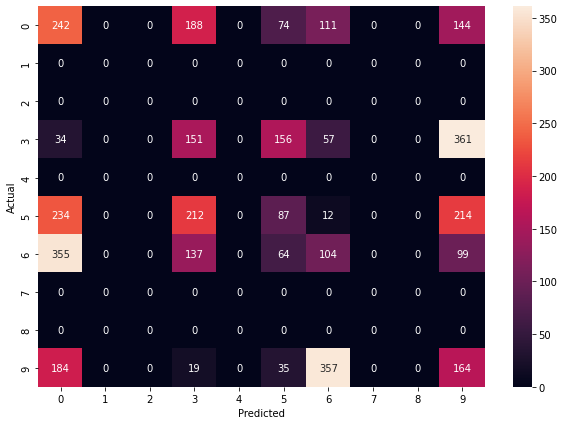

In [89]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [90]:
#Tranning Prediction
train_pred=model.predict(X_Train)

In [91]:
train_predicted=[]
for datapoint in train_pred:
  train_predicted.append(np.argmax(dataPoint))

In [92]:
cm2 = tf.math.confusion_matrix(labels=Y_Train,predictions=train_predicted)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix For Train Data')

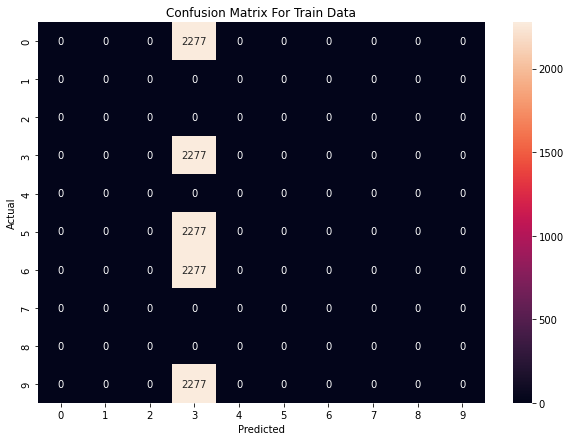

In [93]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Train Data')

# **Optimizer:- SGD with Batch(Whole Size)**

#     EX_3
     Desc:-
            1. 3 Hiden Layer
               1.
               2.
               3.
            2. Stopping Criterion= 10^-4

In [100]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(30, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=10E-4, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=11385,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 2.4656 - accuracy: 0.2000 - val_loss: 2.4423 - val_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 2.4423 - accuracy: 0.2000 - val_loss: 2.4198 - val_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 2.4198 - accuracy: 0.2000 - val_loss: 2.3981 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 70ms/step - loss: 2.3981 - accuracy: 0.2000 - val_loss: 2.3771 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 66ms/step - loss: 2.3771 - accuracy: 0.2000 - val_loss: 2.3568 - val_accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 2.3568 - accuracy: 0.2000 - val_loss: 2.3373 - val_accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 0s 69ms/step - loss: 2.3373 - accuracy: 0.2000 - val_loss: 2.3185 - val_accuracy: 0.2000
Epoch 8/100
1/1 [==

Best Validation Loss: 1.7812
Best Validation Accuracy: 0.2208


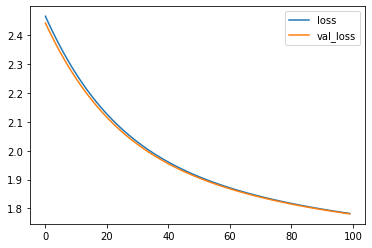

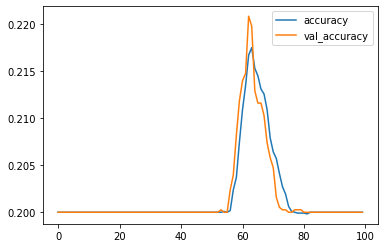

In [102]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [103]:
y_pred = model.predict(X_Test)

In [104]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [105]:
y_pred

array([[0.7281268 , 0.22923878, 0.3373336 , ..., 0.3295698 , 0.35418278,
        0.7346989 ],
       [0.72553056, 0.22856894, 0.33887258, ..., 0.3288523 , 0.3550372 ,
        0.7342403 ],
       [0.72594887, 0.2290643 , 0.33649096, ..., 0.33009863, 0.35515165,
        0.73603976],
       ...,
       [0.7274776 , 0.2310081 , 0.33688936, ..., 0.33089995, 0.3543586 ,
        0.7341141 ],
       [0.7258522 , 0.2288014 , 0.33826768, ..., 0.33030567, 0.35669655,
        0.73720163],
       [0.7273506 , 0.22913063, 0.33743384, ..., 0.3309463 , 0.3552286 ,
        0.7373891 ]], dtype=float32)

In [106]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0, 759,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 759,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 759,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 759,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 759,   0,   0,   0,   0,   0,   0]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

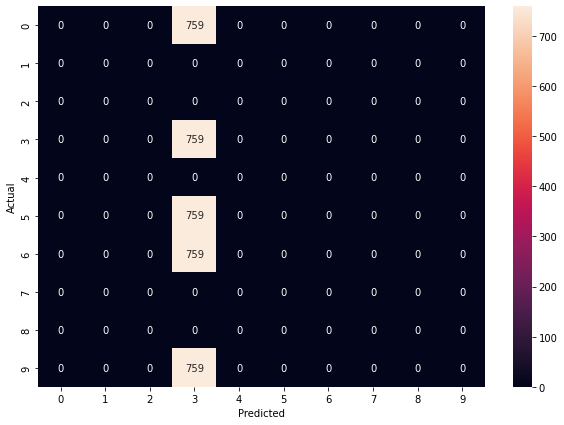

In [107]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [108]:
#Tranning Prediction
train_pred=model.predict(X_Train)

In [109]:
train_predicted=[]
for datapoint in train_pred:
  train_predicted.append(np.argmax(dataPoint))

In [110]:
cm2 = tf.math.confusion_matrix(labels=Y_Train,predictions=train_predicted)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2277,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix For Train Data')

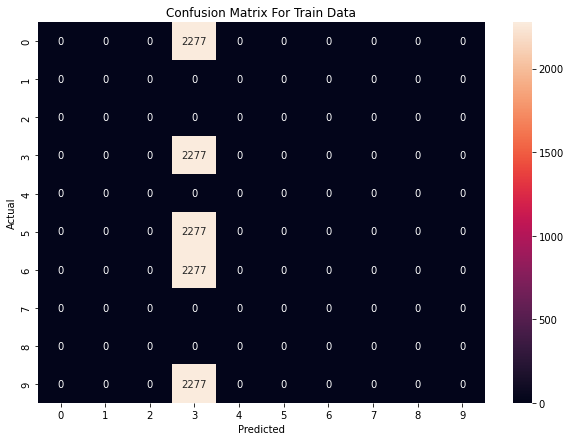

In [112]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Train Data')

# **Optimizer:- GD with Batch(Whole Size)**

#     EX_4
     Desc:-
            1. 3 Hiden Layer
               1.
               2.
               3.
            2. Stopping Criterion= 10^-4

In [113]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=10E-4, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=11385,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 1s 750ms/step - loss: 2.7106 - accuracy: 0.0000e+00 - val_loss: 2.5430 - val_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 2.5430 - accuracy: 0.2000 - val_loss: 2.4060 - val_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 2.4061 - accuracy: 0.2000 - val_loss: 2.2935 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 2.2936 - accuracy: 0.2000 - val_loss: 2.2007 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 2.2007 - accuracy: 0.2000 - val_loss: 2.1237 - val_accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 2.1238 - accuracy: 0.2000 - val_loss: 2.0597 - val_accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 2.0598 - accuracy: 0.2000 - val_loss: 2.0063 - val_accuracy: 0.2000
Epoch 8/100
1/1

Best Validation Loss: 1.6577
Best Validation Accuracy: 0.2000


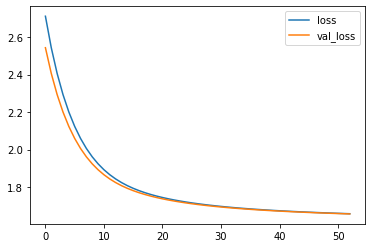

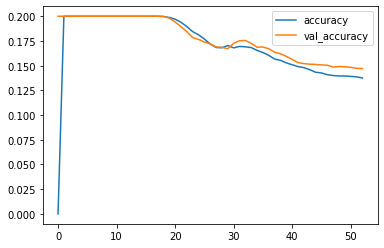

In [115]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [116]:
y_pred = model.predict(X_Test)

In [117]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [118]:
y_pred

array([[0.8194788 , 0.17338051, 0.19288824, ..., 0.17153764, 0.19077063,
        0.8193931 ],
       [0.81913745, 0.17335604, 0.19291088, ..., 0.17182799, 0.19043006,
        0.820191  ],
       [0.81931746, 0.17297289, 0.19275518, ..., 0.17154749, 0.19033988,
        0.8196959 ],
       ...,
       [0.8197212 , 0.1733315 , 0.19275548, ..., 0.17156525, 0.19050339,
        0.8200431 ],
       [0.8196204 , 0.172886  , 0.19297111, ..., 0.17121768, 0.18943134,
        0.8200739 ],
       [0.8196348 , 0.17322293, 0.19237322, ..., 0.17104298, 0.19011723,
        0.81973726]], dtype=float32)

In [119]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[190,   0,   0, 107,   0, 292,  89,   0,   0,  81],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [211,   0,   0,  91,   0,  60, 106,   0,   0, 291],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [143,   0,   0, 114,   0,  62, 129,   0,   0, 311],
       [161,   0,   0,  52,   0,  98,  19,   0,   0, 429],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 31,   0,   0,  64,   0,  60, 416,   0,   0, 188]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

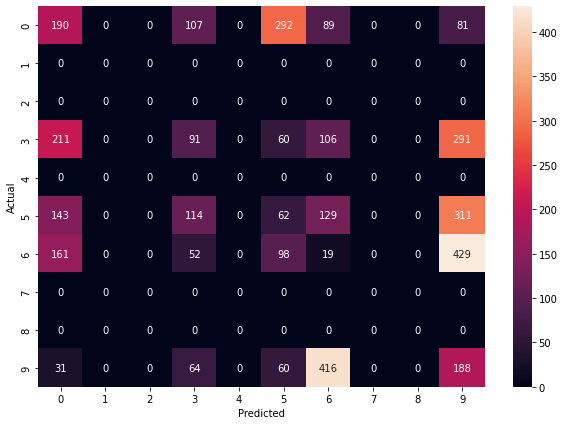

In [121]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [122]:
#Tranning Prediction
train_pred=model.predict(X_Train)

In [123]:
train_predicted=[]
for datapoint in train_pred:
  train_predicted.append(np.argmax(dataPoint))

In [124]:
cm2 = tf.math.confusion_matrix(labels=Y_Train,predictions=train_predicted)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0, 2277,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2277,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2277,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2277,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2277,    0,    0,    0,    0]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix For Train Data')

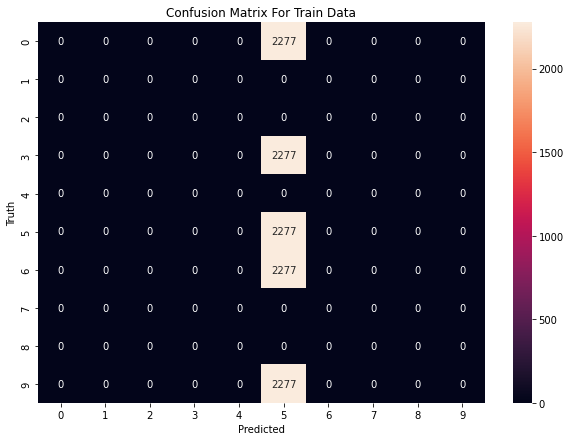

In [125]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix For Train Data')

# SGD With Momentum_NAG
  1.

In [127]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=0.1, momentum=0.8, nesterov=True)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=10E-4, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=32,
    epochs=1000,
    callbacks=[early_stopping]
)

Epoch 1/1000
356/356 [==============================] - 2s 6ms/step - loss: 1.6216 - accuracy: 0.2676 - val_loss: 1.6211 - val_accuracy: 0.2569
Epoch 2/1000
356/356 [==============================] - 2s 5ms/step - loss: 1.6209 - accuracy: 0.2752 - val_loss: 1.6206 - val_accuracy: 0.2614


Best Validation Loss: 1.6206
Best Validation Accuracy: 0.2614


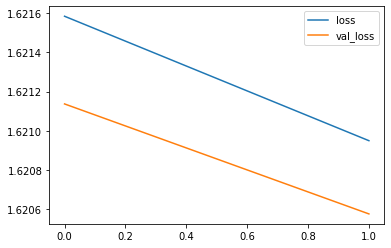

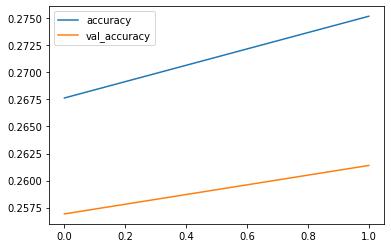

In [131]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [132]:
model.evaluate(X_Test, Y_Test)

119/119 [==============================] - 0s 2ms/step - loss: 1.6211 - accuracy: 0.2585


[1.6211186647415161, 0.25849801301956177]

In [133]:
y_pred = model.predict(X_Test)

In [134]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [135]:
y_pred

array([[0.91818964, 0.13818482, 0.14467275, ..., 0.14015485, 0.12637998,
        0.91659856],
       [0.917502  , 0.13745314, 0.14432213, ..., 0.14100502, 0.12572065,
        0.9168519 ],
       [0.91748476, 0.13840011, 0.14423054, ..., 0.14084184, 0.12600785,
        0.9167097 ],
       ...,
       [0.91779864, 0.13744149, 0.14360082, ..., 0.14099291, 0.12576512,
        0.9172435 ],
       [0.9177907 , 0.13735689, 0.14358826, ..., 0.14039472, 0.12635496,
        0.91687506],
       [0.9179996 , 0.13771898, 0.14318721, ..., 0.14075162, 0.12525961,
        0.9169878 ]], dtype=float32)

In [136]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[749,   0,   0,   0,   0,   0,   7,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [748,   0,   0,   0,   0,   3,   8,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [752,   0,   0,   0,   0,   0,   6,   0,   0,   1],
       [560,   0,   0,   0,   0,   0, 193,   0,   0,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [718,   0,   0,   0,   0,   1,   1,   0,   0,  39]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

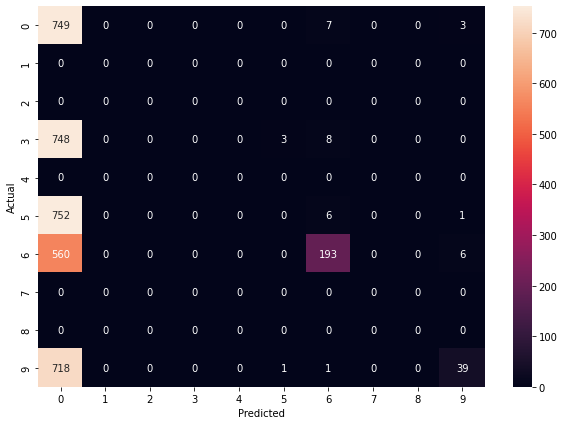

In [137]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# RMSprop Algorithm
           1.

In [138]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
rms=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.99,
    momentum=0.9,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
    #**kwargs
)

model.compile(optimizer=rms,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [139]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=10E-4, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
356/356 [==============================] - 2s 3ms/step - loss: 0.4613 - accuracy: 0.8348 - val_loss: 0.1454 - val_accuracy: 0.9518
Epoch 2/100
356/356 [==============================] - 1s 3ms/step - loss: 0.1243 - accuracy: 0.9618 - val_loss: 0.1481 - val_accuracy: 0.9573


Best Validation Loss: 0.1454
Best Validation Accuracy: 0.9573


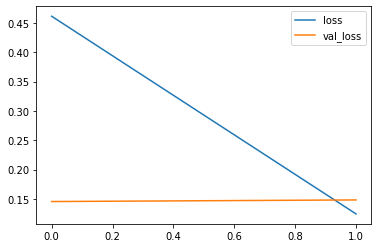

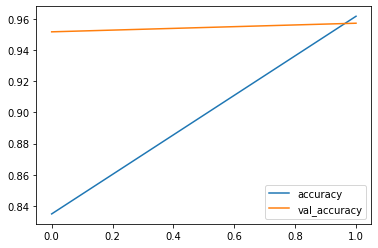

In [140]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [141]:
model.evaluate(X_Test, Y_Test)

119/119 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9605


[0.13636860251426697, 0.9604743123054504]

In [142]:
y_pred = model.predict(X_Test)

In [143]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [144]:
y_pred

array([[9.4432330e-01, 1.9396594e-03, 2.5474061e-03, ..., 1.6050992e-03,
        2.6049130e-03, 9.9385744e-01],
       [8.7853360e-01, 2.4414847e-03, 1.7994983e-03, ..., 1.0551296e-03,
        1.6002093e-03, 9.9998891e-01],
       [8.6770433e-01, 2.6137896e-03, 1.9230639e-03, ..., 1.2105153e-03,
        1.9651516e-03, 9.9998677e-01],
       ...,
       [9.8630893e-01, 7.1924162e-04, 1.1036304e-03, ..., 9.3371887e-04,
        9.9887815e-04, 9.9192917e-01],
       [9.9328619e-01, 5.8095541e-04, 1.2255833e-03, ..., 2.1211789e-03,
        7.9520541e-04, 6.7761606e-01],
       [9.9999547e-01, 7.9429119e-05, 1.8176247e-04, ..., 2.2727056e-04,
        5.5128632e-05, 9.9686265e-01]], dtype=float32)

In [147]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[744,   0,   0,   2,   0,   3,   7,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 711,   0,  35,   4,   0,   0,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,  10,   0, 721,  16,   0,   0,   6],
       [  7,   0,   0,   0,   0,   9, 743,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,  10,   0,  11,   1,   0,   0, 726]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

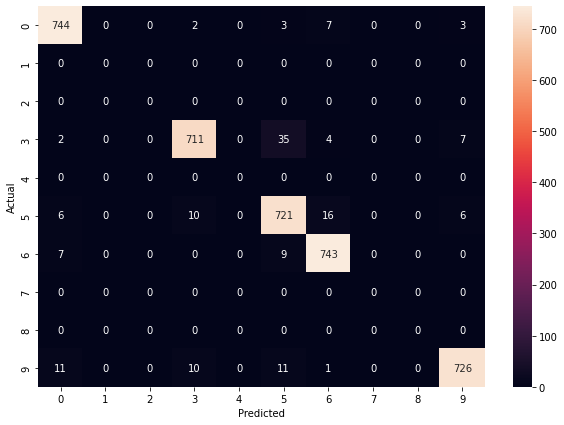

In [148]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adam
      1.

In [149]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name="Adam",
    #**kwargs
)

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [150]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=10E-4, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)


history = model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
356/356 [==============================] - 2s 4ms/step - loss: 0.5290 - accuracy: 0.8200 - val_loss: 0.1719 - val_accuracy: 0.9449
Epoch 2/100
356/356 [==============================] - 1s 3ms/step - loss: 0.1493 - accuracy: 0.9519 - val_loss: 0.1540 - val_accuracy: 0.9489
Epoch 3/100
356/356 [==============================] - 1s 3ms/step - loss: 0.1219 - accuracy: 0.9600 - val_loss: 0.1260 - val_accuracy: 0.9578
Epoch 4/100
356/356 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9678 - val_loss: 0.1184 - val_accuracy: 0.9599
Epoch 5/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9728 - val_loss: 0.1136 - val_accuracy: 0.9613
Epoch 6/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9781 - val_loss: 0.1035 - val_accuracy: 0.9663
Epoch 7/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9817 - val_loss: 0.1487 - val_accuracy: 0.9491

Best Validation Loss: 0.1035
Best Validation Accuracy: 0.9663


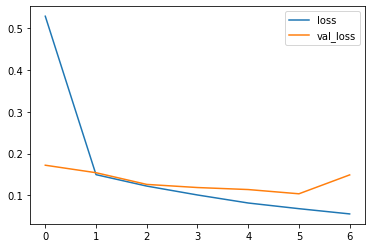

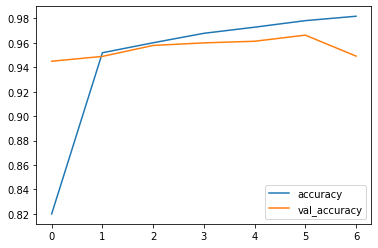

In [151]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [152]:
model.evaluate(X_Test, Y_Test)

119/119 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9673


[0.10391805320978165, 0.9673254489898682]

In [153]:
y_pred = model.predict(X_Test)

In [154]:
pred_out = []
for dataPoint in y_pred:
  pred_out.append(np.argmax(dataPoint))

In [155]:
y_pred

array([[0.29477525, 0.0139025 , 0.0039808 , ..., 0.00477867, 0.00951467,
        0.34568074],
       [0.02503425, 0.01684463, 0.00578667, ..., 0.00194636, 0.00681171,
        0.9991473 ],
       [0.03859748, 0.01829866, 0.00632268, ..., 0.00202691, 0.0072599 ,
        0.99953306],
       ...,
       [0.23134208, 0.01250889, 0.00435108, ..., 0.00253372, 0.00752108,
        0.54673845],
       [0.5053992 , 0.02241566, 0.01620751, ..., 0.0050146 , 0.0082786 ,
        0.0521135 ],
       [0.9995276 , 0.01117782, 0.00422424, ..., 0.0054114 , 0.00848643,
        0.63035744]], dtype=float32)

In [156]:
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[749,   0,   0,   4,   0,   2,   3,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 734,   0,  18,   0,   0,   0,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,  21,   0, 727,   4,   0,   0,   2],
       [  5,   0,   0,   0,   0,  24, 730,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   0,   0,  16,   0,   4,   0,   0,   0, 731]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

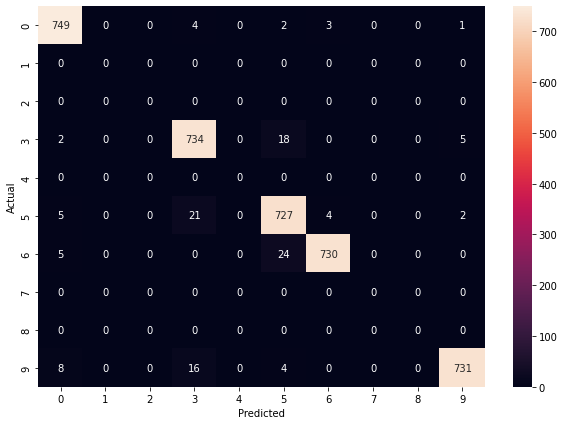

In [157]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')